In [65]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [66]:
data_set = pd.read_csv('/content/winequality-white.csv', sep=';')

print(data_set.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [67]:
# Escolher uma variável preditora
X = data_set[['residual sugar']].values
y = data_set['density'].values

In [68]:
type(X), X.shape

(numpy.ndarray, (4898, 1))

In [69]:
X

array([[20.7],
       [ 1.6],
       [ 6.9],
       ...,
       [ 1.2],
       [ 1.1],
       [ 0.8]])

In [70]:
y.shape

(4898,)

In [71]:
# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
X_train.shape, X_test.shape

((3918, 1), (980, 1))

In [73]:
# 2. Modelo de Rede Neural
nn_model = Sequential([
Dense(10, activation='relu', input_shape=(1,)),
Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae']) #Preparar a rede neural

In [75]:
# Treinar o modelo de rede neural
nn_model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2785 - mae: 0.4589
Epoch 2/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0446 - mae: 0.1801
Epoch 3/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0021 - mae: 0.0363
Epoch 4/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1961e-04 - mae: 0.0044
Epoch 5/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.4375e-05 - mae: 0.0046
Epoch 6/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.7962e-05 - mae: 0.0039
Epoch 7/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.7663e-05 - mae: 0.0039
Epoch 8/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1035e-05 - mae: 0.0030
Epoch 9/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6960e-05 - mae: 0.0025
Epoch 10/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8412e-05 - mae: 0.0022


In [76]:
# Avaliar o modelo de rede neural
y_pred_nn = nn_model.predict(X_test) # Y^

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [77]:
print("Rede Neural:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_nn):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_nn):.2f}")

Rede Neural:
Mean Absolute Error: 0.00
Mean Squared Error: 0.00


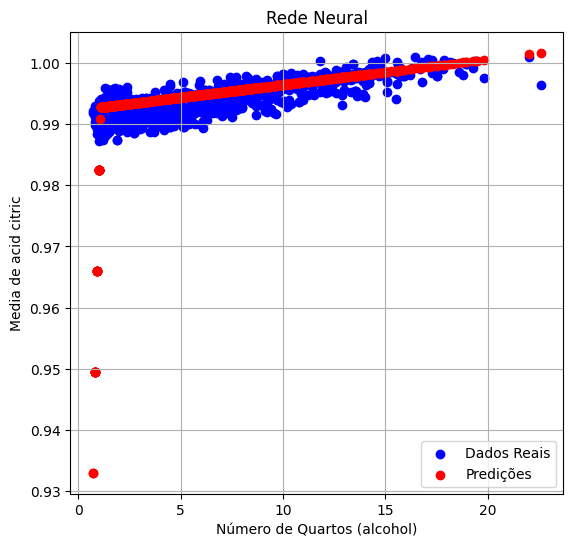

In [78]:
# Gráfico de dispersão para Rede Neural
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Dados Reais')
plt.scatter(X_test, y_pred_nn, color='red', label='Predições')
plt.title('Rede Neural')
plt.xlabel('Número de Quartos (alcohol)')
plt.ylabel('Media de acid citric')
plt.legend()
plt.grid()

plt.show()